### Dependencias

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.linear_model import Perceptron

### Generación de datos sintéticos

In [10]:
# make_blobs se puede usar para generar blobs de puntos con una distribución gaussiana.
# BLOB (Binary Large Object) (Objeto binario grande) Almacena datos binarios.

X,y = make_blobs(100,2, centers=2, cluster_std=0.2)

In [11]:
#X,y


### Conjunto de Entrenamiento
$$S_n=\{(x^{(i)},y^{(i)}), i = 1, \cdots, n\}$$

In [12]:
Sn = pd.DataFrame(X,columns=['x1','x2'])
Sn['y']=y

Sn.head()

,x1,x2,y
0,-6.609738,-3.119832,1
1,-7.262423,-3.256494,1
2,5.178651,-0.913594,0
3,4.912588,-0.621260,0
4,-6.312518,-3.467809,1


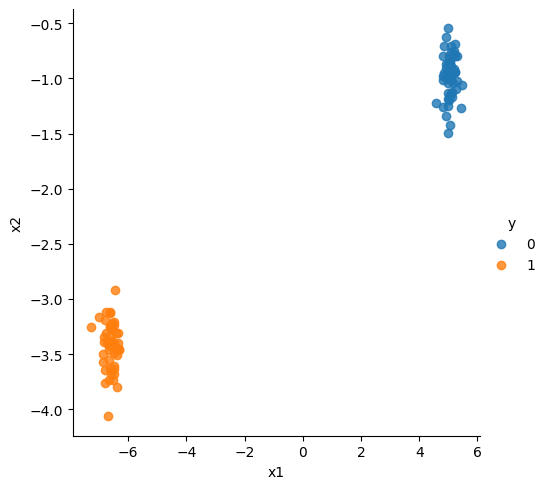

In [13]:
sns.lmplot(data=Sn, x='x1',y='x2',hue='y', fit_reg=False)

### Implementación del Perceptrón Medio

In [14]:
def PerceptronMedio (Sn:pd.DataFrame,T:int)->tuple:
    k=0  #Esto es solo para contar los errores
    
    # Usamos el -1, porque necesitamos el último numero que arroja la función
    #  (Es lo mismo que usar [1], ya que shape() arroja dos valores, posición 0 y 1)
    d= Sn.shape[-1]-1
    n= Sn.shape[0]
    theta= np.zeros(d)
    thetagorro =np.zeros(d)
    # Usamos datos tipo float para evitar errores en la compilación
    theta0= 0.0
    theta0gorro = 0.0
    c = 1

    for t in range(T):
        for i in range(n):
            x=Sn.loc[i].values[:d]
            y=Sn.loc[i].values[-1]
            
            # Recordemos que lo que buscamos es +1 o -1 (resultado que está en relación al producto punto),
            # pero no el valor del producto punto.
            if y*(np.sign(np.dot(theta,x+theta0)))<=0:
                k += 1
                theta += y*x
                theta0 +=y   
                thetagorro += c*y*x
                theta0gorro +=c*y
                # print(theta,theta0)
            c -=1/(n*T)
    return thetagorro,theta0gorro,k



In [15]:
thetagorro,theta0gorro,k=PerceptronMedio(Sn,10)
thetagorro,theta0gorro,k

(array([-6.60973824, -3.11983192]), 1.0, 501)

### Ecuación del Clasificador 
$$\theta\cdot x + \theta_0$$

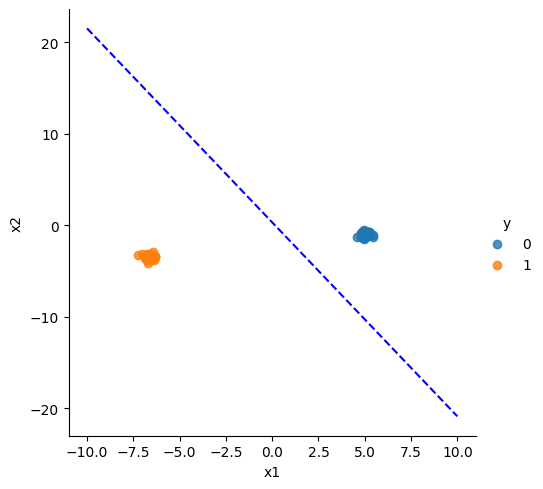

In [16]:
sns.lmplot(data=Sn, x='x1',y='x2', hue='y', fit_reg=False)
x1 = np.linspace(-10,10,100)
x2 = (-theta0gorro-thetagorro[0]*x1)/thetagorro[1]
plt.plot(x1,x2,linestyle='--', color='blue')